<a href="https://www.youtube.com/watch?v=da5GNkAZO54&list=PLxqBkZuBynVS8mDTc8ZGermXiS-32pR2y&index=37&ab_channel=Rohan-Paul-AI"><h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Link YouTube Video - Bitcoin Price Prediction with FB Prophet | Time Series with Machine Learning </b></h1></a>

[![IMAGE ALT TEXT](https://imgur.com/OVL66Xu.png)](https://www.youtube.com/watch?v=da5GNkAZO54&list=PLxqBkZuBynVS8mDTc8ZGermXiS-32pR2y&index=37&ab_channel=Rohan-Paul-AI)


-------------------------

## [Dataset source](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko?select=bitcoin.csv)

The mathematical equation behind the Prophet model is defined as:

y(t) = g(t) + s(t) + h(t) + e(t)

with, g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.

s(t) represents periodic changes (weekly, monthly, yearly).

h(t) represents the effects of holidays (recall: Holidays impact businesses).

e(t) is the error term.

The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [2]:
BTC = pd.read_csv('../input/bitcoin.csv')
BTC.head(2)

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin


In [3]:
BTC.shape

(3036, 5)

In [4]:
BTC.tail(2)

,date,price,total_volume,market_cap,coin_name
3034,2023-04-24 00:00:00.000,27606.578348,1.143565e+10,5.337532e+11,bitcoin
3035,2023-04-25 00:00:00.000,27511.635682,1.644310e+10,5.322908e+11,bitcoin


In [5]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3036 non-null   object 
 1   price         3036 non-null   float64
 2   total_volume  3036 non-null   float64
 3   market_cap    3035 non-null   float64
 4   coin_name     3036 non-null   object 
dtypes: float64(3), object(2)
memory usage: 118.7+ KB


In [6]:
BTC.isnull().sum()

date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

## Convert the 'date' column from object to datetime

In [7]:
# convert the 'Date' column to datetime format
BTC['date']= pd.to_datetime(BTC['date'])

## If your are only want to work with BTC market data starting from a particular date use below modification

However, here I am using the full set of historical data starting 2015-01-01

In [8]:
# # start_date = '2019-01-01'
# BTC = BTC.loc[BTC['date'] >= start_date].copy()

In [9]:
BTC.shape

(3036, 5)

In [10]:
# Renaming the columns names
BTC.rename(columns = {'date':'ds', 'price':'y'}, inplace = True)
BTC.head(2)

,ds,y,total_volume,market_cap,coin_name
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin


<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Augmented Dickey-Fuller (ADF) Test </h3>
</div>



A time series is said to be “stationary” if it has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time.

One way to test whether a time series is stationary is to perform an augmented Dickey-Fuller test, which uses the following null and alternative hypotheses:

### H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time, or series has a unit root.

### HA: The time series is stationary, or series has no unit root.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

In probability theory and statistics, a unit root is a feature of some stochastic processes (such as random walks) that can cause problems in statistical inference involving time series models. In simple terms, the unit root is non-stationary but does not always have a trend component.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

## Conditions to Reject Null Hypothesis(HO)

### If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [11]:
from statsmodels.tsa.stattools import adfuller

btc_price_vol = BTC[['y', 'total_volume']]
btc_price_vol.head()


,y,total_volume
0,313.992,4.699936e+07
1,314.446,3.885591e+07
2,286.572,1.187789e+08
3,260.936,2.055001e+08
4,273.220,1.550381e+08


In [12]:
result = adfuller(btc_price_vol.y.values, autolag='AIC')

print(f'ADF Statistic: {result[0]}')

print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.5835404875926942
p-value: 0.4918561866708274
Critial Values:
   1%, -3.4325272764323667
Critial Values:
   5%, -2.862501980355106
Critial Values:
   10%, -2.567282087313508


## Interpretation of above

1.**ADF Statistic:** The ADF test statistic is -1.5835404875926942. This value represents the test statistic used to compare with the critical values to determine if the time series has a unit root or not.

1. **p-value**: The p-value is 0.4332135104793123. This value indicates the probability of observing a test statistic as extreme as the one obtained if the null hypothesis were true. In general, if the p-value is less than a chosen significance level (e.g., 0.05 or 0.01), we reject the null hypothesis.

2. **Critical Values**: These are the critical values of the test statistic at different significance levels (1%, 5%, and 10%). We compare the ADF test statistic with these critical values to determine whether to reject the null hypothesis.

Now, let's interpret the results:

### The ADF test statistic is -1.5835404875926942, which is greater than all critical values (-3.432627366129768 at 1%, -2.862546185823105 at 5%, and -2.567305621914905 at 10%).

### The p-value is 0.4918561866708274, which is greater than the common significance levels (0.05 or 0.01).

## Based on these findings, we fail to reject the null hypothesis. 

This means that we do not have enough evidence to conclude that the time series is stationary. In other words, the time series likely has a unit root, and it is non-stationary.

To make the series stationary, you can try differencing the series, applying a transformation (e.g., logarithmic), or using seasonal decomposition. After applying any of these techniques, you can perform the ADF test again to check if the modified series is stationary.

----------------------------

## Does the data have to be stationary to forecast with Prophet?

No. Stationarity is an important condition for some other time series forecasting algorithms such as ARMA or ARIMA, but prophet assumes nothing about stationarity.

Prophet rather makes use of features like trend or seasonality, which stationary data by definition do not have. So, if you feed stationary data into prophet, the forecast result most likely would be close to a flat line. We could say that forecasting with such data is not forte of Prophet.

In [13]:
model = Prophet(interval_width=0.8)
# business forecast tasks training
model.fit(BTC)

00:08:32 - cmdstanpy - INFO - Chain [1] start processing
00:08:32 - cmdstanpy - INFO - Chain [1] done processing


## We created data for the next two months.

In [14]:
future = model.make_future_dataframe(periods=2, freq='M')

In [15]:
# Let us now use this dataset to make predictions for the future using the model.

forecast = model.predict(future)

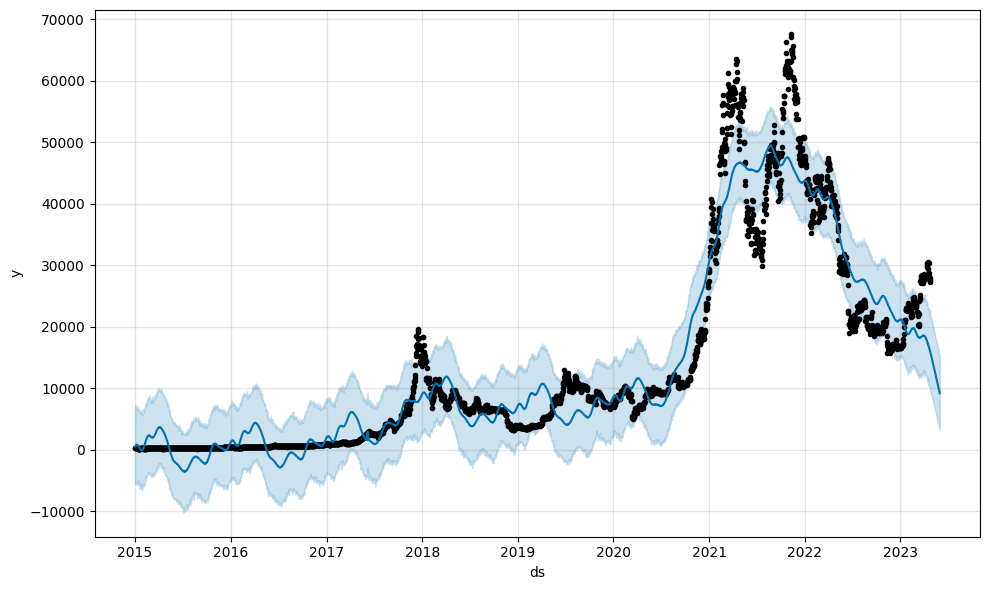

In [16]:
# visualizing time series analysis
fig1 = model.plot(forecast)

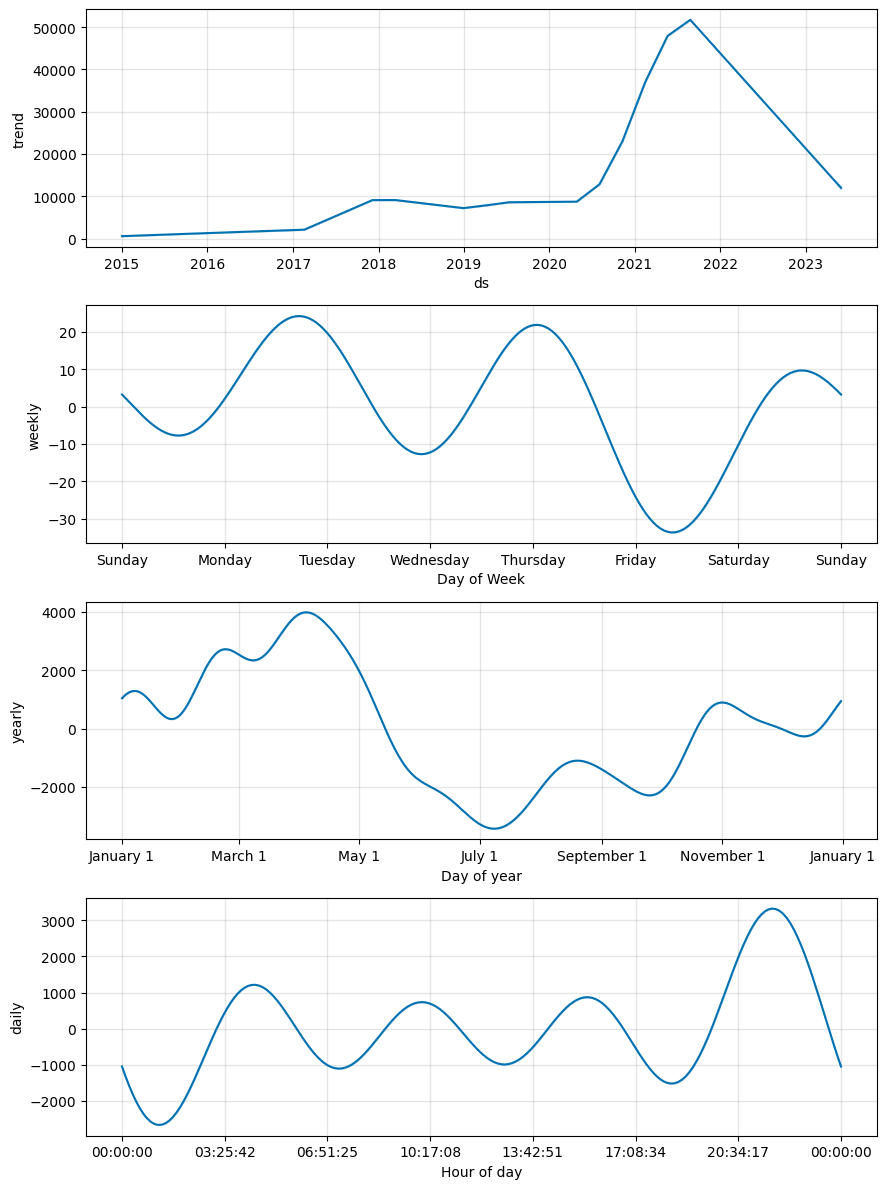

In [17]:
fig2 = model.plot_components(forecast)

<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Training The Model With Logistic Growth </h3>
</div>


The logistic growth model is more suitable for cases where the growth of the series is expected to slow down as it approaches a certain limit.

In our case, we will fix the carrying capacity to a constant value, because the prices last year are increasing and decreasing at the same time.

 A carrying capacity is usually some maximum achievable point. The important things about the carrying capacity are that it can be specified for every row in the data frame or it can also be constant based on data.

In [18]:
BTC['cap'] = 80000

In [19]:
# confidence interval of 50%
model_logistic = Prophet(growth='logistic', interval_width=0.5)
# fitting the model
model_logistic.fit(BTC)

00:08:33 - cmdstanpy - INFO - Chain [1] start processing
00:08:34 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# forecasting for future
future = model_logistic.make_future_dataframe(periods=2, freq='M')
# carrying capacity
future['cap'] = 15000
# predictions 
forecast_logistic = model_logistic.predict(future)

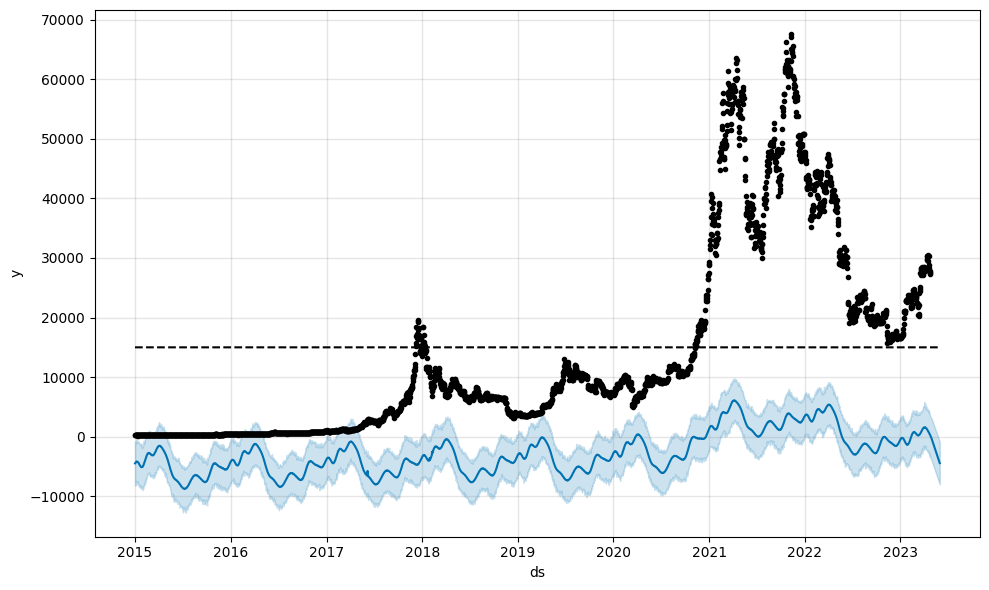

In [21]:
fig1 = model.plot(forecast_logistic)

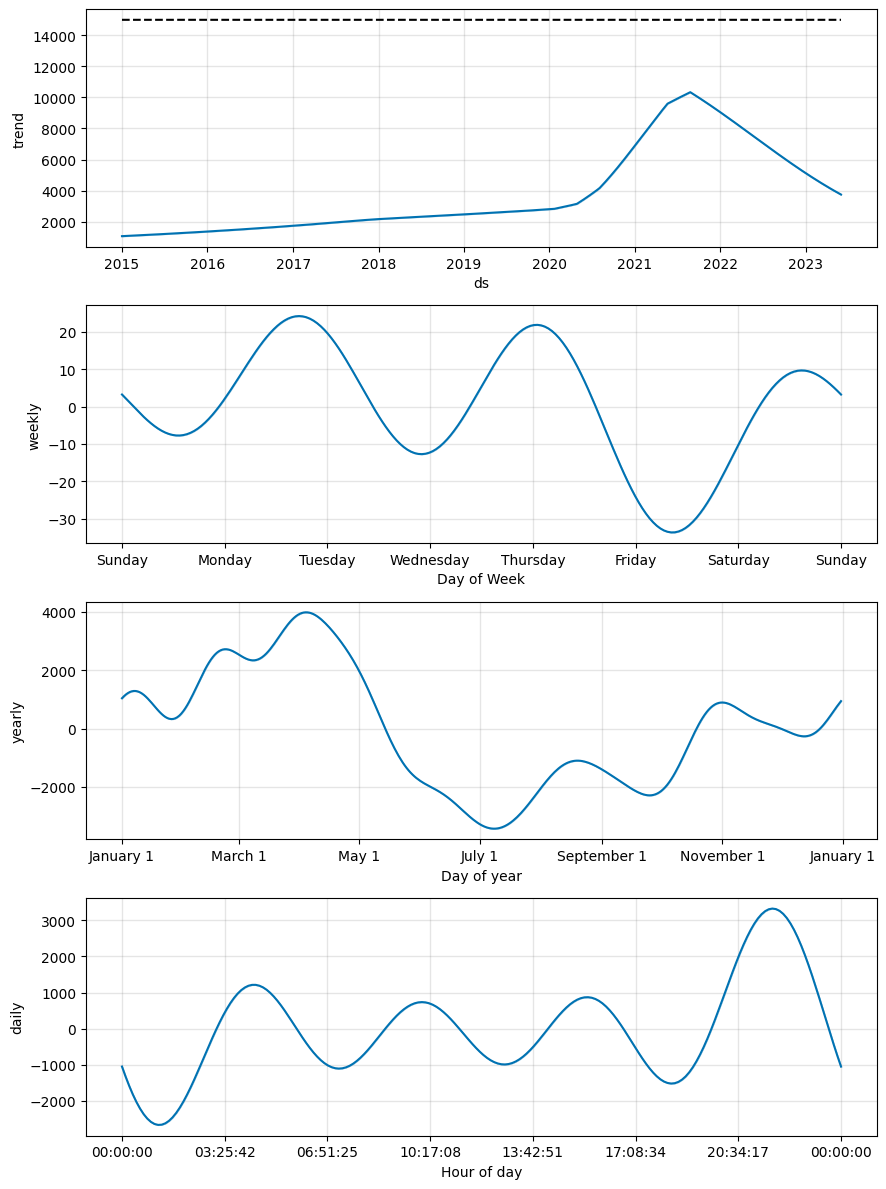

In [22]:
fig2 = model.plot_components(forecast_logistic)

<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Forecast by splitting the data into train and test </h3>
</div>



In [26]:
split_date = '2022-10-24'
train_df = BTC.loc[BTC['ds'] <= split_date].copy()
test_df = BTC.loc[BTC['ds'] > split_date].copy()

In [27]:
train_df.head(2)

,ds,y,total_volume,market_cap,coin_name,cap
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,80000
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,80000


In [28]:
print(train_df.shape)
print(test_df.shape)

(2853, 6)
(183, 6)


In [29]:
# Setup and train model
model = Prophet()
model.fit(train_df)

00:08:36 - cmdstanpy - INFO - Chain [1] start processing
00:08:36 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Predict on training set with model
data_test_fcst = model.predict(df=test_df.reset_index())

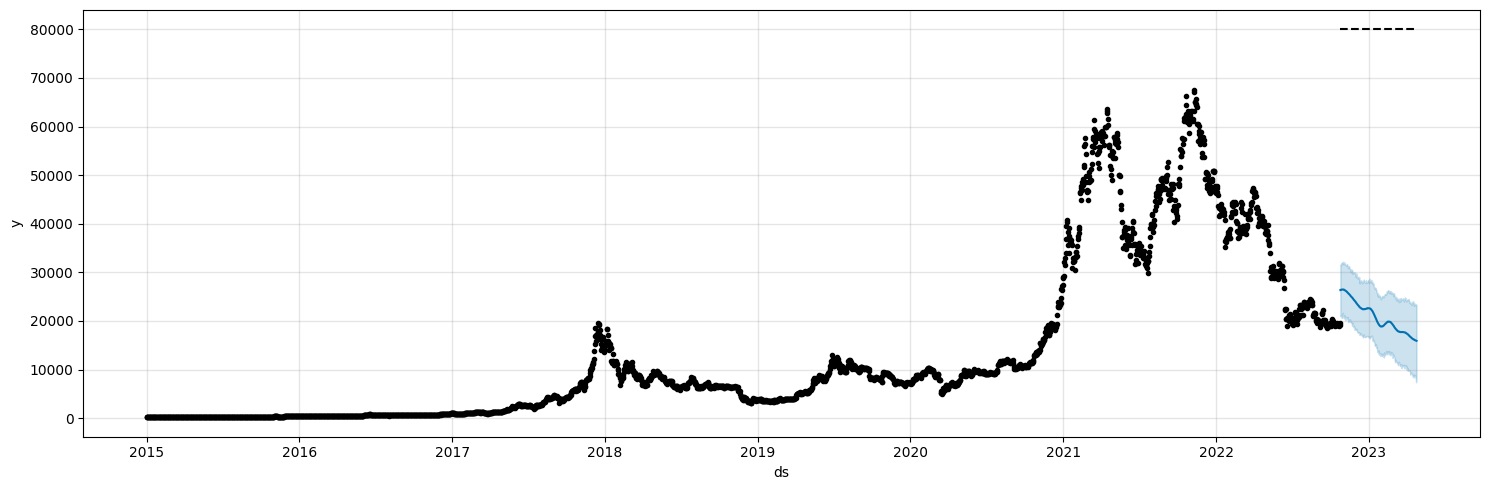

In [31]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst, ax=ax)

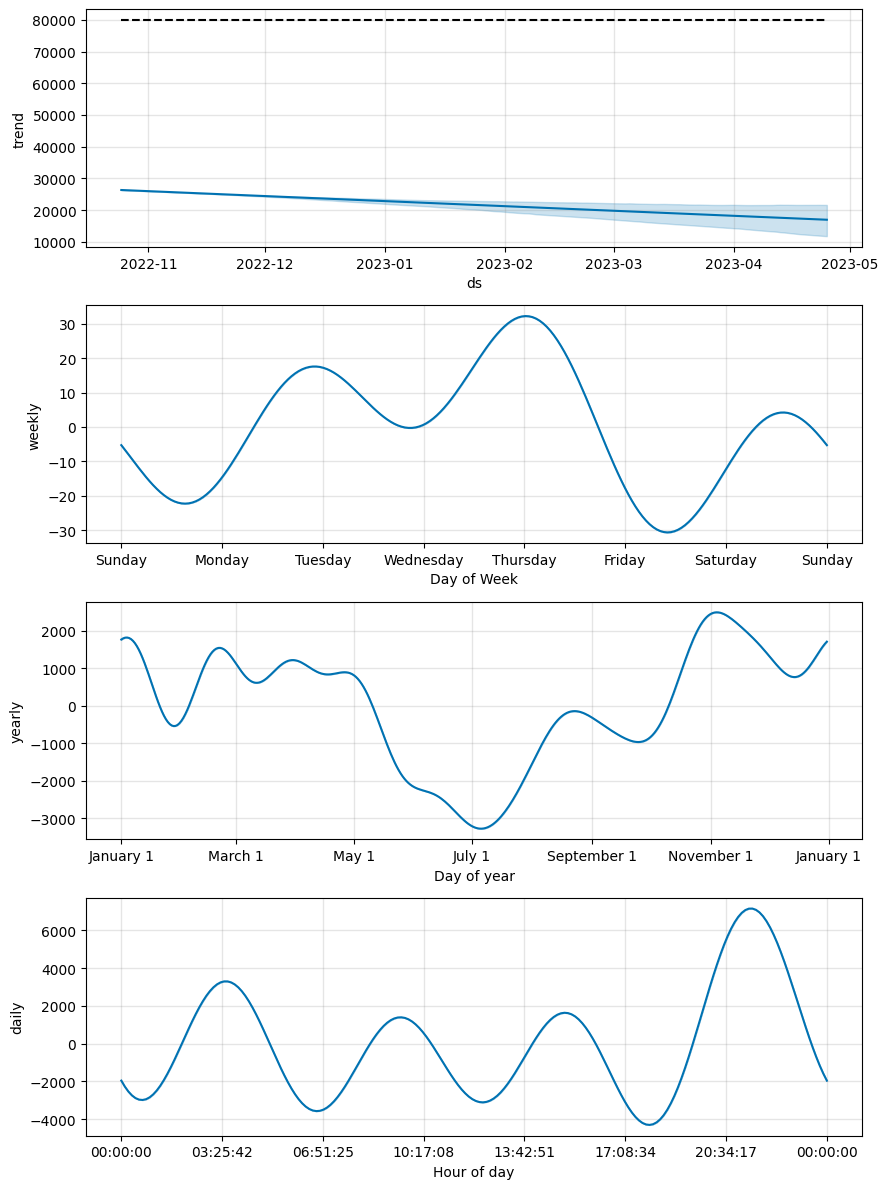

In [32]:
fig = model.plot_components(data_test_fcst)


In [33]:
test_df.head(2)
# print(test_df.index)

,ds,y,total_volume,market_cap,coin_name,cap
2853,2022-10-25,19316.940623,2.865717e+10,3.706228e+11,bitcoin,80000
2854,2022-10-26,20095.152231,3.984625e+10,3.854769e+11,bitcoin,80000


## Plot the forecast with the actuals

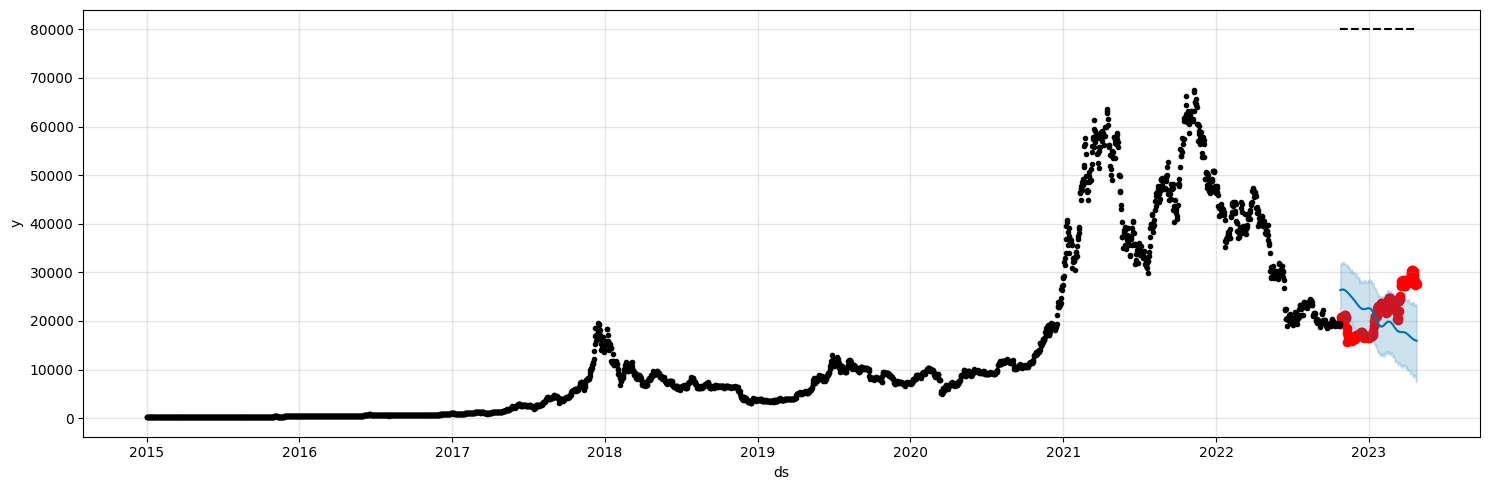

In [34]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

ax.scatter(test_df.ds, test_df['y'], color='r')

fig = model.plot(data_test_fcst, ax=ax)

# Plot the forecast with the actuals

In [36]:
data_test_fcst.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-25,26350.102908,80000,20973.585553,31605.842884,26350.102908,26350.102908,11.571606,11.571606,11.571606,...,17.249448,17.249448,17.249448,1958.760093,1958.760093,1958.760093,0.0,0.0,0.0,26361.674514
1,2022-10-26,26298.602486,80000,21169.481483,31469.011109,26298.602486,26298.602486,94.972893,94.972893,94.972893,...,0.647719,0.647719,0.647719,2058.763109,2058.763109,2058.763109,0.0,0.0,0.0,26393.575379
2,2022-10-27,26247.102065,80000,20994.709929,31879.592682,26247.102065,26247.102065,216.622170,216.622170,216.622170,...,32.251640,32.251640,32.251640,2148.808466,2148.808466,2148.808466,0.0,0.0,0.0,26463.724235
3,2022-10-28,26195.601644,80000,20684.526451,31681.419762,26195.601644,26195.601644,246.109103,246.109103,246.109103,...,-17.930649,-17.930649,-17.930649,2228.477687,2228.477687,2228.477687,0.0,0.0,0.0,26441.710746
4,2022-10-29,26144.101222,80000,20620.048744,32089.569033,26144.101222,26144.101222,320.826841,320.826841,320.826841,...,-12.248783,-12.248783,-12.248783,2297.513559,2297.513559,2297.513559,0.0,0.0,0.0,26464.928063


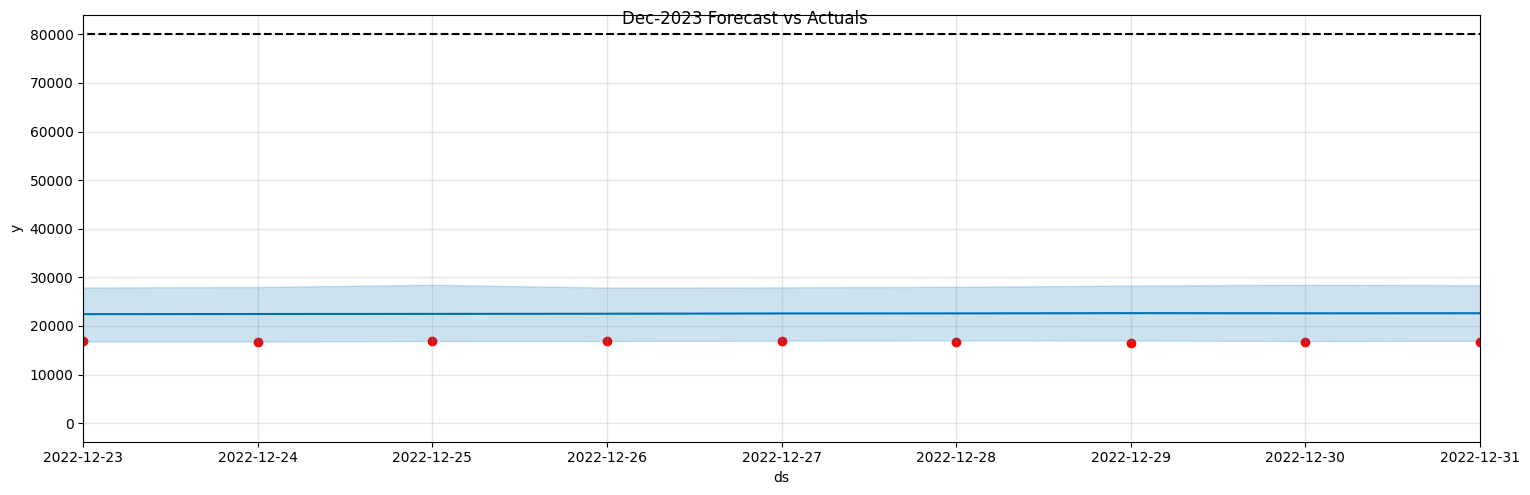

In [37]:
import datetime as dt

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

ax.scatter(test_df.ds, test_df['y'], color='r')

fig = model.plot(data_test_fcst, ax=ax)

# create datetime objects from string representations of dates
lower = dt.datetime(2022, 12, 23)
upper = dt.datetime(2022, 12, 31)

ax.set_xbound(lower=lower, upper=upper)
# ax.set_xbound(lower='2022-23-12', upper='2022-31-12')

# set x-axis bounds
# ax.set_xlim(lower, upper)


# ax.set_ylim(0, 10000)
plot = plt.suptitle('Dec-2023 Forecast vs Actuals')

In [39]:
mean_absolute_error(y_true=test_df['y'],
                   y_pred=data_test_fcst['yhat'])

6532.6407726612